# Ciencia de datos (CC408) - Primavera 2024

## Trabajo Práctico 1 - Parte 2

### Reglas de formato y presentation
- El trabajo debe tener una extensión máxima de 8 páginas (no se permite Apéndice). Se espera una buena redacción en la resolución del práctico.
- El informe debe ser entregado en formato PDF, con los gráficos e imágenes en este mismo archivo.
- Entregar el código con los comandos utilizados, identificando claramente a qué inciso corresponde cada comando.

### Fecha de entrega:
Miércoles 2 de octubre a las 23:59 hs.

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 - Parte 2 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- al siguiente email: ispiousas@udesa.edu.ar
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se corregirán sus tareas hasta no recibir el correo.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

### Parte I: Limpieza de la base

#### Ejercicio 1
La base de datos provista contiene información sobre oferentes de Airbnb en la ciudad de Nueva York. Realicen una limpieza de la base.
- Tengan en cuenta si hay valores duplicados y eliminénlos.
- Eliminen las columnas que no tienen información de interés. Sacar la fecha.
- (Opcional) Luego de leer el artículo __[Missing-data imputation](https://bookdown.org/mike/data_analysis/imputation-missing-data.html##imputation-missing-data)__ (__[Missing-data imputation articulo alternativo](http://www.stat.columbia.edu/~gelman/arm/missing.pdf)__), decidan qué hacer con los missing values e implementen su decision. Justifiquen su eleccion. Pueden usar informacion del paper mencionado o de otras fuentes (citenlas si las usan) para explicar los problemas que pueden surgir por su estrategia elegida. Sacar la fecha.
- Si hay observaciones con *outliers* o valores que no tienen sentido, tomen una decision. Expliquen las decisiones tomadas. Sacarlo a partir de todas las columnas. Reviews per month, 0
- Transformen las variables **‘neighbourhood_group’** y **‘room_type’** a variables numericas.
- Con la ayuda de los comandos <code>groupby</code> y <code>join</code> o <code>merge</code>, creen una columna que tenga la cantidad de oferentes por “Neighbourhood group”. Llamen a esa nueva columna <code>offer group</code>

In [49]:
import pandas as pd

# cargo archivo CSV en un df
df_airbnb_ny_crudo = pd.read_csv('/Users/juancosta/Downloads/TP2 2/Base Airbnb NY.csv')
df_airbnb_ny_crudo


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48900,19454344,Perfect ap in Manhattan! Walking to Central Park!,11670284,Val,Manhattan,Upper East Side,40.76811,-73.95194,Entire home/apt,150.0,3,10,2019-05-02,0.54,2,89
48901,36224876,Upper East Side Apt By The Water,46232598,Caitlin,Manhattan,Upper East Side,40.77001,-73.94915,Entire home/apt,150.0,1,1,2019-07-01,1.00,1,130
48902,21869051,Comfy Apt in NYC Brownstone,97243693,Joyce,Manhattan,Murray Hill,40.74812,-73.97663,Entire home/apt,150.0,3,57,2019-07-01,3.07,2,49
48903,3004563,The spot,15303460,Emma,Brooklyn,Prospect-Lefferts Gardens,40.65595,-73.95412,Private room,50.0,7,1,2019-06-08,0.94,1,125


In [20]:
# Chequeo cuantos datos hay duplicados

datos_dup = df_airbnb_ny_crudo.duplicated().sum()

print("Número de datos duplicados:",datos_dup)

# Los saco de mi df

df_airbnb_ny_nodup = df_airbnb_ny_crudo.drop_duplicates()
df_airbnb_ny_nodup

Número de datos duplicados: 10


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70.0,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40.0,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115.0,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55.0,1,0,NaN,NaN,6,2


In [21]:
# Saco las columnas irrelevantes, host_id, hostname, latitude y longitude
df_airbnb_ny_nodup_clean = df_airbnb_ny_nodup.drop(columns=['host_id', 'host_name','last_review','reviews_per_month'])
df_airbnb_ny_nodup_clean

,id,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,6,365
1,2595,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70.0,2,0,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40.0,4,0,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115.0,10,0,1,27
48893,36485609,43rd St. Time Square-cozy single bed,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55.0,1,0,6,2


In [24]:
# Elimino los missing values de acuerdo al Listwise Deletion

df_airbnb_ny_nodup_clean_full = df_airbnb_ny_nodup_clean.dropna()
df_airbnb_ny_nodup_clean_full

,id,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,6,365
1,2595,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70.0,2,0,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40.0,4,0,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115.0,10,0,1,27
48893,36485609,43rd St. Time Square-cozy single bed,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55.0,1,0,6,2


In [26]:
#Si hay observaciones con outliers o valores que no tienen sentido, tomen una decision. 
#Expliquen las decisiones tomadas. Sacarlo a partir de todas las columnas. 

In [51]:
import numpy as np

# aplico logaritmo a las variables seleccionadas para normalizar y disminuir la varianza
df_airbnb_ny_nodup_clean_full['log_minimum_nights'] = np.log(df_airbnb_ny_nodup_clean_full['minimum_nights'] + 1)
df_airbnb_ny_nodup_clean_full['log_price'] = np.log(df_airbnb_ny_nodup_clean_full['price'] + 1)
df_airbnb_ny_nodup_clean_full['log_number_of_reviews'] = np.log(df_airbnb_ny_nodup_clean_full['number_of_reviews'] + 1)
df_airbnb_ny_nodup_clean_full['log_calculated_host_listings_count'] = np.log(df_airbnb_ny_nodup_clean_full['calculated_host_listings_count'] + 1)
df_airbnb_ny_nodup_clean_full['log_availability_365'] = np.log(df_airbnb_ny_nodup_clean_full['availability_365'] + 1)
df_airbnb_ny_nodup_clean_full

/var/folders/c8/3fzwh9y95v7fpczww9knjw5m0000gn/T/ipykernel_35502/2056106948.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_airbnb_ny_nodup_clean_full['log_minimum_nights'] = np.log(df_airbnb_ny_nodup_clean_full['minimum_nights'] + 1)
/var/folders/c8/3fzwh9y95v7fpczww9knjw5m0000gn/T/ipykernel_35502/2056106948.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_airbnb_ny_nodup_clean_full['log_price'] = np.log(df_airbnb_ny_nodup_clean_full['price'] + 1)
/var/folders/c8/3fzwh9y95v7fpczww9knjw5m0000gn

,id,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,log_minimum_nights,log_price,log_number_of_reviews,log_calculated_host_listings_count,log_availability_365
0,2539,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,6,365,0.693147,5.010635,2.302585,1.945910,5.902633
1,2595,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2,355,0.693147,5.420535,3.828641,1.098612,5.874931
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,1,365,1.386294,5.017280,0.000000,0.693147,5.902633
3,3831,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,1,194,0.693147,4.499810,5.602119,0.693147,5.273000
4,5022,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,1,0,2.397895,4.394449,2.302585,0.693147,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70.0,2,0,2,9,1.098612,4.262680,0.000000,1.098612,2.302585
48891,36485057,Affordable room in Bushwick/East Williamsburg,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40.0,4,0,2,36,1.609438,3.713572,0.000000,1.098612,3.610918
48892,36485431,Sunny Studio at Historical Neighborhood,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115.0,10,0,1,27,2.397895,4.753590,0.000000,0.693147,3.332205
48893,36485609,43rd St. Time Square-cozy single bed,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55.0,1,0,6,2,0.693147,4.025352,0.000000,1.945910,1.098612


In [53]:
# Saco las columnas que no están transformadas
f_airbnb_ny_log = df_airbnb_ny_nodup_clean_full.drop(columns=['minimum_nights', 'price','number_of_reviews','calculated_host_listings_count','availability_365'])
df_airbnb_ny_log

,id,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,log_minimum_nights,log_price,log_number_of_reviews,log_calculated_host_listings_count,log_availability_365
0,2539,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,0.693147,5.010635,2.302585,1.945910,5.902633
1,2595,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,0.693147,5.420535,3.828641,1.098612,5.874931
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,1.386294,5.017280,0.000000,0.693147,5.902633
3,3831,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,0.693147,4.499810,5.602119,0.693147,5.273000
4,5022,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,2.397895,4.394449,2.302585,0.693147,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,1.098612,4.262680,0.000000,1.098612,2.302585
48891,36485057,Affordable room in Bushwick/East Williamsburg,Brooklyn,Bushwick,40.70184,-73.93317,Private room,1.609438,3.713572,0.000000,1.098612,3.610918
48892,36485431,Sunny Studio at Historical Neighborhood,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,2.397895,4.753590,0.000000,0.693147,3.332205
48893,36485609,43rd St. Time Square-cozy single bed,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,0.693147,4.025352,0.000000,1.945910,1.098612


In [40]:
# Filtrar con IQR

columnas = ['log_minimum_nights', 'log_price','log_number_of_reviews','log_calculated_host_listings_count','log_availability_365']


# Calcular Q1 (percentil 25) y Q3 (percentil 75) para cada columna numérica
Q1 = df_airbnb_ny_log[columnas].quantile(0.25)
Q3 = df_airbnb_ny_log[columnas].quantile(0.75)

# Calcular el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Filtrar datos que estén dentro del rango de valores aceptables (no outliers)
df_airbnb_ny_no_outliers = df_airbnb_ny_log[~((df_airbnb_ny_log[columnas] < (Q1 - 2.5 * IQR)) | (df_airbnb_ny_log[columnas] > (Q3 + 2.5 * IQR))).any(axis=1)]

# Mostrar las primeras filas del DataFrame sin outliers
df_airbnb_ny_no_outliers


,id,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,log_minimum_nights,log_price,log_number_of_reviews,log_calculated_host_listings_count,log_availability_365
0,2539,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,0.693147,5.010635,2.302585,1.945910,5.902633
1,2595,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,0.693147,5.420535,3.828641,1.098612,5.874931
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,1.386294,5.017280,0.000000,0.693147,5.902633
3,3831,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,0.693147,4.499810,5.602119,0.693147,5.273000
4,5022,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,2.397895,4.394449,2.302585,0.693147,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,1.098612,4.262680,0.000000,1.098612,2.302585
48891,36485057,Affordable room in Bushwick/East Williamsburg,Brooklyn,Bushwick,40.70184,-73.93317,Private room,1.609438,3.713572,0.000000,1.098612,3.610918
48892,36485431,Sunny Studio at Historical Neighborhood,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,2.397895,4.753590,0.000000,0.693147,3.332205
48893,36485609,43rd St. Time Square-cozy single bed,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,0.693147,4.025352,0.000000,1.945910,1.098612


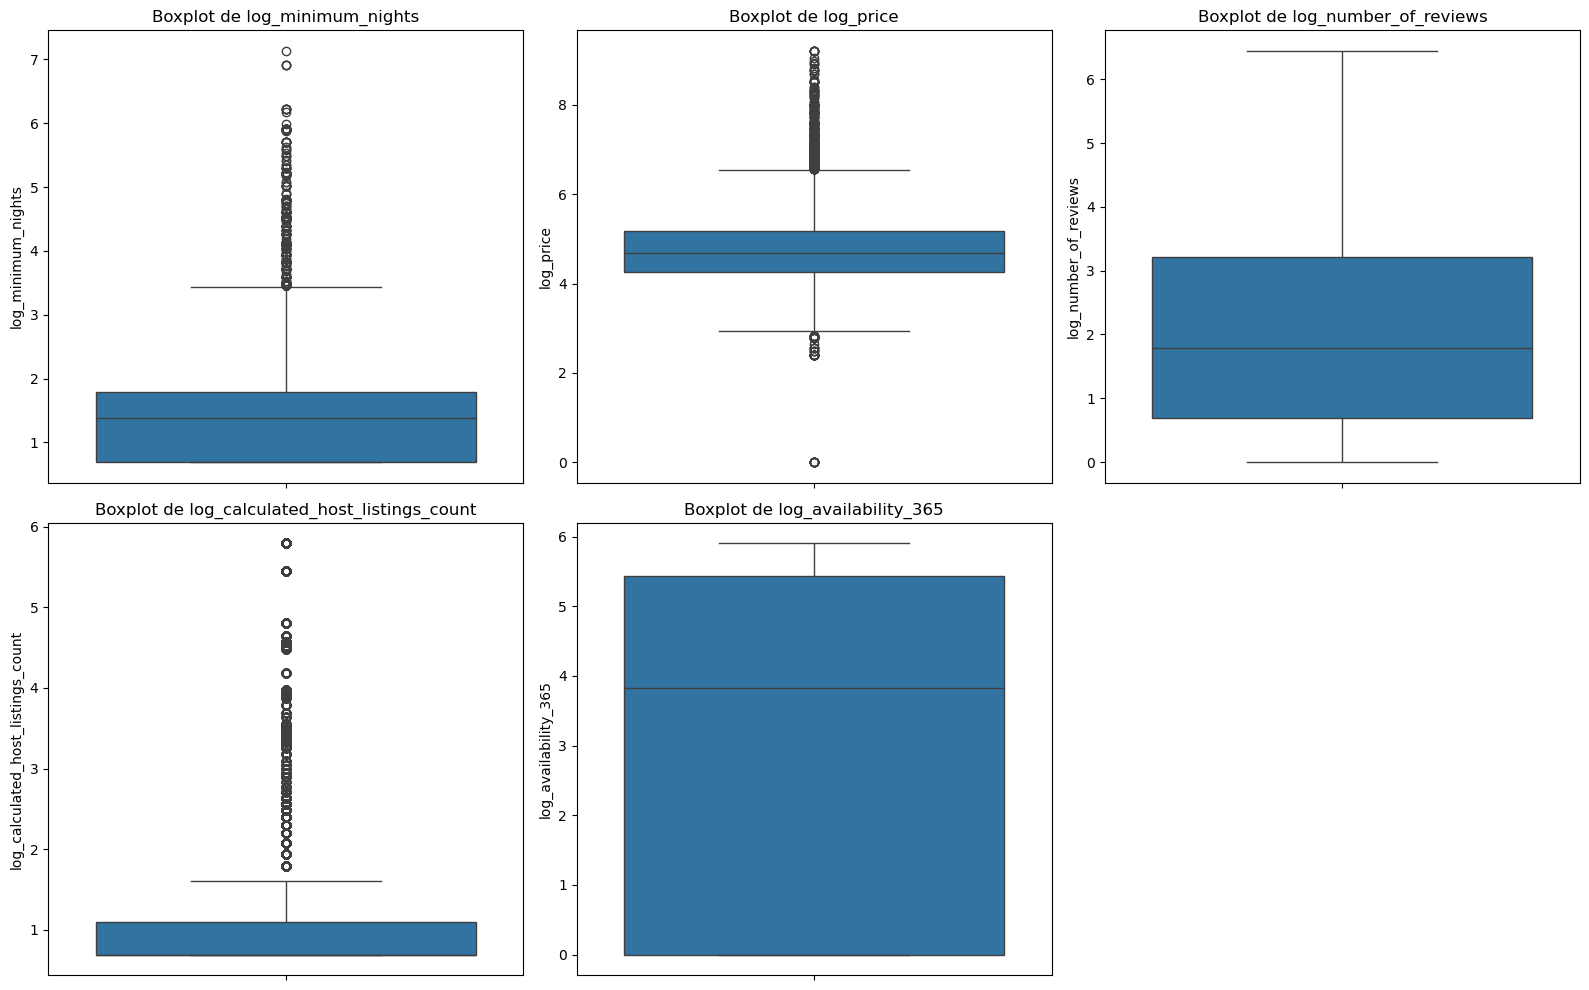

In [42]:

import seaborn as sns
import matplotlib.pyplot as plt

# Crear subplots para visualizar los boxplots de cada columna
plt.figure(figsize=(16, 10))  # Ajustar el tamaño de la figura
for i, col in enumerate(columnas, 1):
    plt.subplot(2, 3, i)  # Crear una cuadrícula de 2 filas y 3 columnas
    sns.boxplot(data=df_airbnb_ny_log[col])
    plt.title(f'Boxplot de {col}')  # Título del gráfico

plt.tight_layout()  # Ajustar el layout para que no se superpongan los gráficos
plt.show()


In [18]:
### Transformen las variables **‘neighbourhood_group’** y **‘room_type’** a variables numericas.

valores_unicos_ng = df_airbnb_ny_no_outliers['neighbourhood_group'].unique()
valores_unicos_rt = df_airbnb_ny_no_outliers['room_type'].unique()

# muestro los valores únicos
print(valores_unicos_ng)
print(valores_unicos_rt)

['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
['Private room' 'Entire home/apt' 'Shared room']


In [44]:
# importo LabelEncoder
from sklearn.preprocessing import LabelEncoder

# creo un objeto de LabelEncoder
label_encoder = LabelEncoder()

# aplico la codificación a la columna categórica
df_airbnb_ny_no_outliers['neighbourhood_encoded'] = label_encoder.fit_transform(df_airbnb_ny_no_outliers['neighbourhood_group'])
df_airbnb_ny_no_outliers['room_encoded'] = label_encoder.fit_transform(df_airbnb_ny_no_outliers['room_type'])


df_airbnb_ny_no_outliers

/var/folders/c8/3fzwh9y95v7fpczww9knjw5m0000gn/T/ipykernel_35502/928571078.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_airbnb_ny_no_outliers['neighbourhood_encoded'] = label_encoder.fit_transform(df_airbnb_ny_no_outliers['neighbourhood_group'])
/var/folders/c8/3fzwh9y95v7fpczww9knjw5m0000gn/T/ipykernel_35502/928571078.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_airbnb_ny_no_outliers['room_encoded'] = label_encoder.fit_transform(df_airbnb_ny_no_outliers['room_type'])


,id,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,log_minimum_nights,log_price,log_number_of_reviews,log_calculated_host_listings_count,log_availability_365,neighbourhood_encoded,room_encoded
0,2539,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,0.693147,5.010635,2.302585,1.945910,5.902633,1,1
1,2595,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,0.693147,5.420535,3.828641,1.098612,5.874931,2,0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,1.386294,5.017280,0.000000,0.693147,5.902633,2,1
3,3831,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,0.693147,4.499810,5.602119,0.693147,5.273000,1,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,2.397895,4.394449,2.302585,0.693147,0.000000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,1.098612,4.262680,0.000000,1.098612,2.302585,1,1
48891,36485057,Affordable room in Bushwick/East Williamsburg,Brooklyn,Bushwick,40.70184,-73.93317,Private room,1.609438,3.713572,0.000000,1.098612,3.610918,1,1
48892,36485431,Sunny Studio at Historical Neighborhood,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,2.397895,4.753590,0.000000,0.693147,3.332205,2,0
48893,36485609,43rd St. Time Square-cozy single bed,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,0.693147,4.025352,0.000000,1.945910,1.098612,2,2


In [46]:
#Con la ayuda de los comandos groupby y join o merge, 
#Creen una columna que tenga la cantidad de oferentes por “Neighbourhood group”. 
#Llamen a esa nueva columna offer group


# agrupo por 'neighbourhood_group' y cuento la cantidad de oferentes en cada grupo
oferentes_por_grupos = df_airbnb_ny_no_outliers.groupby('neighbourhood_group').size().reset_index(name='oferentes_por_grupo')

# uno el conteo al DataFrame original utilizando merge
df_airbnb_ny_limpio = df_airbnb_ny_no_outliers.merge(oferentes_por_grupos, on='neighbourhood_group', how='left')

df_airbnb_ny_limpio

,id,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,log_minimum_nights,log_price,log_number_of_reviews,log_calculated_host_listings_count,log_availability_365,neighbourhood_encoded,room_encoded,oferentes_por_grupo
0,2539,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,0.693147,5.010635,2.302585,1.945910,5.902633,1,1,19260
1,2595,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,0.693147,5.420535,3.828641,1.098612,5.874931,2,0,18853
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,1.386294,5.017280,0.000000,0.693147,5.902633,2,1,18853
3,3831,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,0.693147,4.499810,5.602119,0.693147,5.273000,1,0,19260
4,5022,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,2.397895,4.394449,2.302585,0.693147,0.000000,2,0,18853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44759,36484665,Charming one bedroom - newly renovated rowhouse,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,1.098612,4.262680,0.000000,1.098612,2.302585,1,1,19260
44760,36485057,Affordable room in Bushwick/East Williamsburg,Brooklyn,Bushwick,40.70184,-73.93317,Private room,1.609438,3.713572,0.000000,1.098612,3.610918,1,1,19260
44761,36485431,Sunny Studio at Historical Neighborhood,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,2.397895,4.753590,0.000000,0.693147,3.332205,2,0,18853
44762,36485609,43rd St. Time Square-cozy single bed,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,0.693147,4.025352,0.000000,1.945910,1.098612,2,2,18853


### Parte II: Graficos y visualizaciones

#### Ejercicio 2
Una vez hecha la limpieza, realicen una matriz de correlación con las siguientes variables:**‘neighbourhood group’, ‘latitude’, ‘longitude’, ‘room type’,‘price’, ‘minimum nights’, ‘number of reviews’, ‘reviews per month’,‘calculated host listings count’, ‘availability 365’.** Comenten los resultados. Utilicen alguno de los comandos disponibles en este link para graficar la matriz de correlacion.

*Nota:* consideren cómo es conveniente incluir las variables que originalmente eran categóricas para poder interpretar mejor la matriz de correlación.

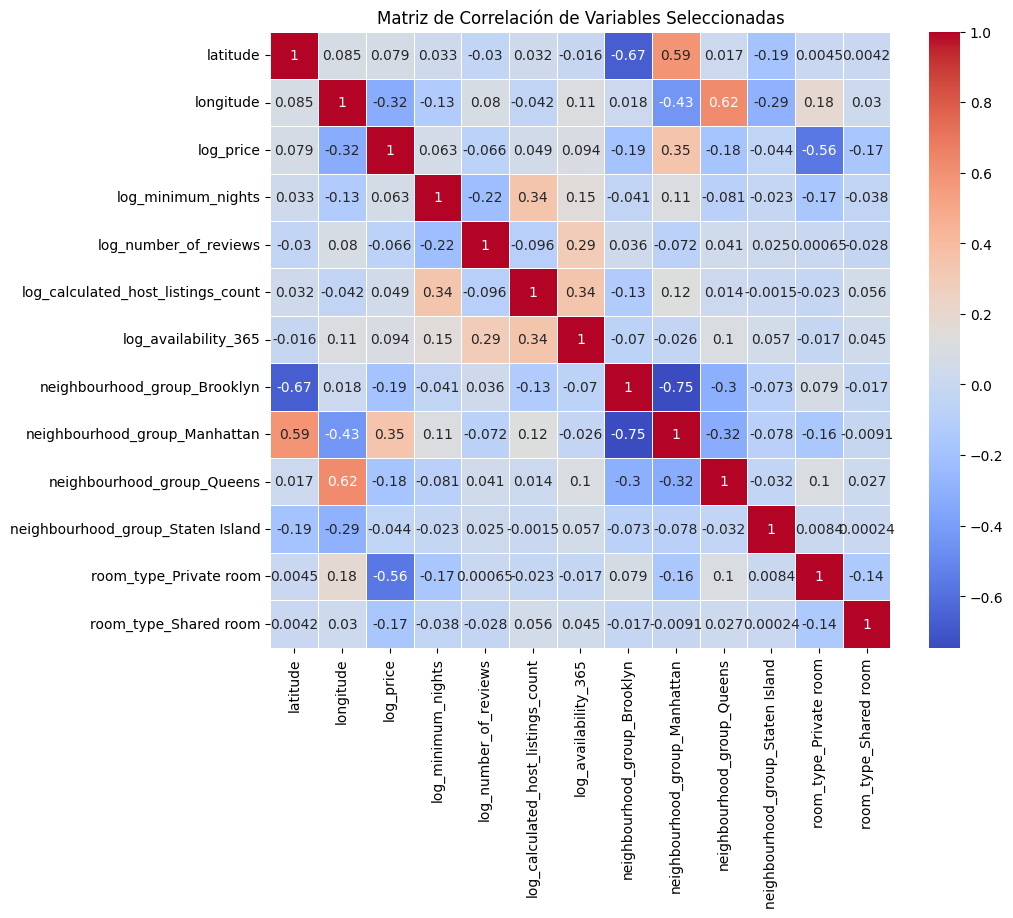

In [21]:
# Resolver acá

import matplotlib.pyplot as plt


# Selecciono las columnas de interés para mi matriz
columnas = ['neighbourhood_group', 'latitude', 'longitude', 'room_type', 'log_price',
            'log_minimum_nights', 'log_number_of_reviews','log_calculated_host_listings_count', 'log_availability_365']
# Armo un df solamente con estas columnas
df_seleccionado = df_airbnb_ny_nodup_clean_full[columnas]

# 2. Convertí las variables ('neighbourhood group' y 'room type') a numéricas usando pd.get_dummies
df_numerico = pd.get_dummies(df_seleccionado, drop_first=True)

# 3. Armo la matriz(sin plotearla)
matriz_correlacion = df_numerico.corr()

# 4. Ploteo la matriz con el heatmap(nos fijamos cómo hacer la parte de heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación de Variables Seleccionadas')
plt.show()



#### Ejercicio 3
Respondan las siguientes preguntas: ¿Cuál es la proporción de oferentes por “Neighbourhood group”? ¿Y por tipo de habitación? Además, realicen gráficos para mostrar estas composiciones y comenten los resultados.

neighbourhood_group
Manhattan        0.443026
Brooklyn         0.411162
Queens           0.115914
Bronx            0.022266
Staten Island    0.007633
Name: proportion, dtype: float64


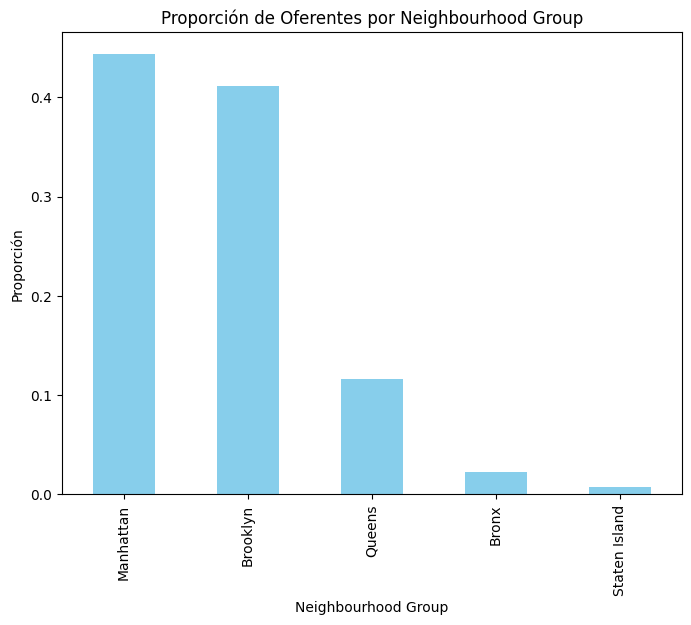

In [22]:
# Resolver acá
# La función "value_counts" cunta cuántos registros hay para cada categoría y  divide la cantidad 
# de registros de cada categoría por el total de registros, para obtener la proporción.
proporcion_neighbourhood = df_airbnb_ny_nodup_clean_full['neighbourhood_group'].value_counts(normalize=True)
print(proporcion_neighbourhood)
# Se visualiza con un plot normal
proporcion_neighbourhood.plot(kind='bar', figsize=(8, 6), color='skyblue')
plt.title('Proporción de Oferentes por Neighbourhood Group')
plt.ylabel('Proporción')
plt.xlabel('Neighbourhood Group')
plt.show()

#En los graficos se visualiza claramente una dominación entre manhattan y brookling. Nos pusimos a investigar y manhattan contiene una 
# cantidad de habitantes de 1.69M y brookling 2.74,bronk; 1.47, staten island: 500k y queens: 2.41

#Al principio nuestra hipotesis era que como manhattan y brookling era la que mayor densidad de población tenìan, era evidente que tengan más oferentrs.
#Luego, al ver estos resultados, nos damos cuenta de que la variable "habitantes" no influye para entender la proporción de oferentes
#Es por esta razón que podríamos hacer la investigación acerca de la cantidad de turistas que van a cada ciudad. CLARAMENTE brooklin y manhatan son los citios más visitados.Para proximos reportes...


room_type
Entire home/apt    0.519749
Private room       0.456532
Shared room        0.023719
Name: proportion, dtype: float64


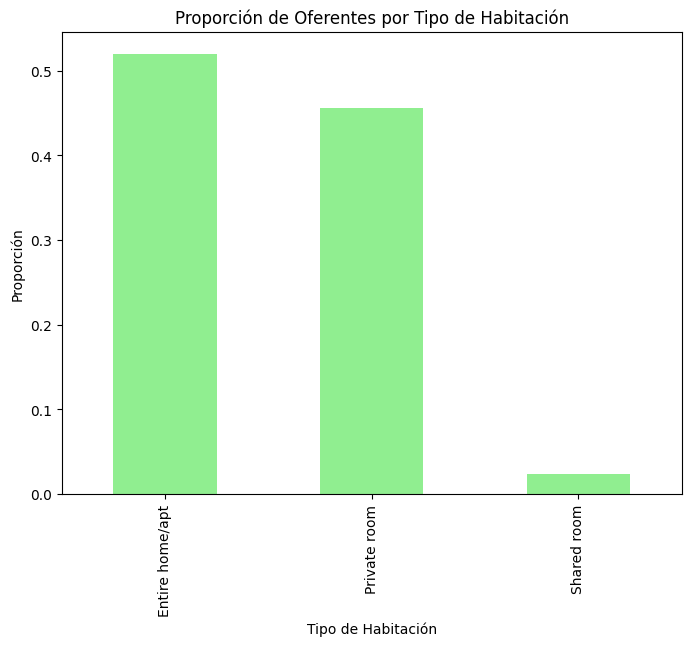

In [23]:
# Mismo procedimiento
proporcion_room_type = df_airbnb_ny_nodup_clean_full['room_type'].value_counts(normalize=True)
print(proporcion_room_type)
# Visualizamos la proporción con un plot
proporcion_room_type.plot(kind='bar', figsize=(8, 6), color='lightgreen')
plt.title('Proporción de Oferentes por Tipo de Habitación')
plt.ylabel('Proporción')
plt.xlabel('Tipo de Habitación')
plt.show()

#Es evidente que la gente demanda cuartos privados. Tal vez no es significativa la cantidad de jovenes que piden cuartos compartidos
#O mismo, no los alquilarán por airbnb. Ya que esta plataforma se especializa en departamentos o private rooms, aunque tiene (menos) oferta de shared rooms
#Lo que debatimos es que puede estar sesgada.

#### Ejercicio 4
Realicen un histograma de los precios de los alojamientos. Comenten el gráfico obtenido. Además, respondan las siguientes preguntas: ¿cuál es el precio mínimo, máximo y promedio? ¿Cuál es la media de precio por “Neighbourhood group” y por tipo de habitación? 

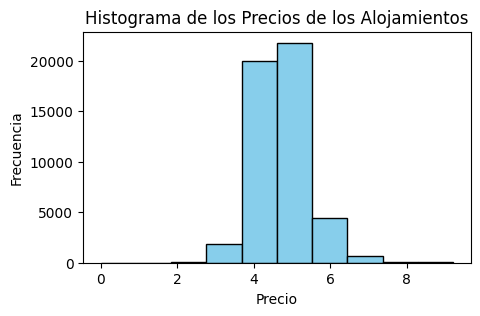

Precio mínimo: 0.0
Precio máximo: 10000.0
Precio promedio: 152.7338122134905

Media de precio por Neighbourhood group:
neighbourhood_group
Bronx             87.425551
Brooklyn         124.403962
Manhattan        196.880266
Queens            99.536900
Staten Island    114.812332
Name: price, dtype: float64

Media de precio por Tipo de Habitación:
room_type
Entire home/apt    211.793480
Private room        89.790568
Shared room         70.075928
Name: price, dtype: float64


In [24]:
# Resolver acá

# 1. Histograma de los precios normalizados. Se observan precios con distribución normal. 
# Ahora haciendo el max, mean y min vamos a ver cuales son los extremos. 
plt.figure(figsize=(5, 3))
plt.hist(df_airbnb_ny_nodup_clean_full['log_price'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histograma de los Precios de los Alojamientos')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()
#Cómo la distribucion parece normal, los precios extremos son esos atipicos.

# 2.Mínimo, máximo y promedio
precio_minimo = df_airbnb_ny_nodup_clean_full['price'].min()
precio_maximo = df_airbnb_ny_nodup_clean_full['price'].max()
precio_promedio = df_airbnb_ny_nodup_clean_full['price'].mean()
print(f"Precio mínimo: {precio_minimo}")
print(f"Precio máximo: {precio_maximo}")
print(f"Precio promedio: {precio_promedio}")

# 3. Hacemos el promedio de precios agrupandolos por barrio.
#es interesante ver como staten island es mucho más caro que bronx y queens. A pesar de que estos dos tengan muchos más oferentes.
# Seguro el hecho de que sea una isla, es un factor determinante, más que es una zona turistica-
media_precio_neighbourhood = df_airbnb_ny_nodup_clean_full.groupby('neighbourhood_group')['price'].mean()

# Mostramos resultados
print("\nMedia de precio por Neighbourhood group:")
print(media_precio_neighbourhood)

# 4. Media de precio por tipo de habitación
media_precio_room_type = (df_airbnb_ny_nodup_clean_full.groupby('room_type')['price'].mean())

# Mostrar resultados
print("\nMedia de precio por Tipo de Habitación:")
print(media_precio_room_type)

#En cuanto al tipo de habitación, los departamentos completos tienen un precio promedio
#significativamente más alto ($211.79) en comparación con las habitaciones privadas 
#($89.79) y compartidas ($70.07). Esto refleja la variabilidad de precios según la ubicación 
#y el tipo de alojamiento ofrecido.

#### Ejercicio 5
Realicen dos scatter plots con dos variables de interés en cada uno. Comenten.

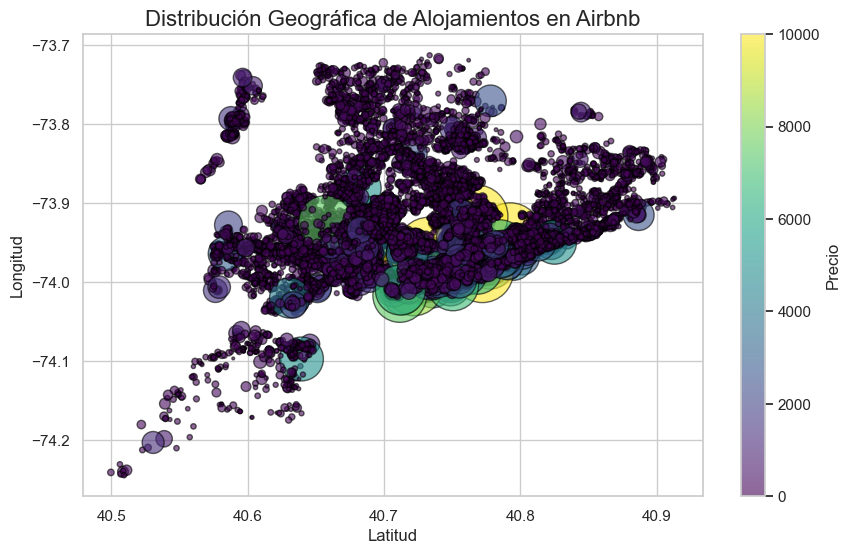

In [25]:
# Resolver acá
# CLARAMENTE lo hicimos chat gpt, PERO es MUY interesante.(Dejo los comentarios para que se vea lo que me dijo gpt)


import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo general para hacer el gráfico más atractivo
sns.set(style='whitegrid')

# Crear un scatter plot
plt.figure(figsize=(10, 6))

# Dibujar el scatter plot con colores y tamaños personalizados
scatter = plt.scatter(
    df_airbnb_ny_nodup_clean_full['latitude'],  # Eje x: Latitud
    df_airbnb_ny_nodup_clean_full['longitude'], # Eje y: Longitud
    c=df_airbnb_ny_nodup_clean_full['price'],   # Color de los puntos según el precio
    s=df_airbnb_ny_nodup_clean_full['price'] * 0.2,  # Tamaño de los puntos según el precio
    cmap='viridis',  # Mapa de colores agradable
    alpha=0.6,       # Transparencia para evitar superposición excesiva
    edgecolor='black'  # Añadir borde negro a los puntos para que se vean mejor
)

# Añadir color bar para mostrar la relación con el precio
plt.colorbar(scatter, label='Precio')

# Añadir títulos y etiquetas
plt.title('Distribución Geográfica de Alojamientos en Airbnb', fontsize=16)
plt.xlabel('Latitud', fontsize=12)
plt.ylabel('Longitud', fontsize=12)

# Mostrar el gráfico
plt.show()

# ANALISIS

# El grafico muestra la distribución de los alojamientos de airbnb

# Los puntos más azulados se observan en las periferias(Precios más bajos, propiedades más a las afueras)

# Los puntos más amarllentos, se observan todos en el epicentro(brooklin y manhattan)-(se puede usar para clusterizar por zonas de alta demandas )

# Cada observación muestra una propiedad distinta, se logra observar muy parecido "el mapa de NY"; adjuntamos link de foto. https://www.bing.com/ck/a?!&&p=43c1644c1bf3a5b6JmltdHM9MTcyNzU2ODAwMCZpZ3VpZD0wNjQyMmIzOS1mOTk1LTY2MDAtMzQ3YS0yNTczZjgxYzY3ZWQmaW5zaWQ9NTU3NA&ptn=3&ver=2&hsh=3&fclid=06422b39-f995-6600-347a-2573f81c67ed&u=a1L2ltYWdlcy9zZWFyY2g_cT1tcGElMjBkZSUyMG55JkZPUk09SVFGUkJBJmlkPThFNDY1MDQyOENDQjVFQTg4OUIwREQ4NkVDNTBBNDc5MTNCNzVFNUE&ntb=1
#Que se pueda visualizar claramente el mapa es un idncidio de la cantidad de oferents que hay. 
#Nos llamó la atención un circulo grande abajo, em staten island. Parece como un outlier, pero en realidad es la zona"cara" de la isla(staten island)



In [26]:
df_airbnb_ny_nodup_clean_full.columns



Index(['id', 'name', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'calculated_host_listings_count',
       'availability_365', 'log_minimum_nights', 'log_price',
       'log_number_of_reviews', 'log_calculated_host_listings_count',
       'log_availability_365'],
      dtype='object')

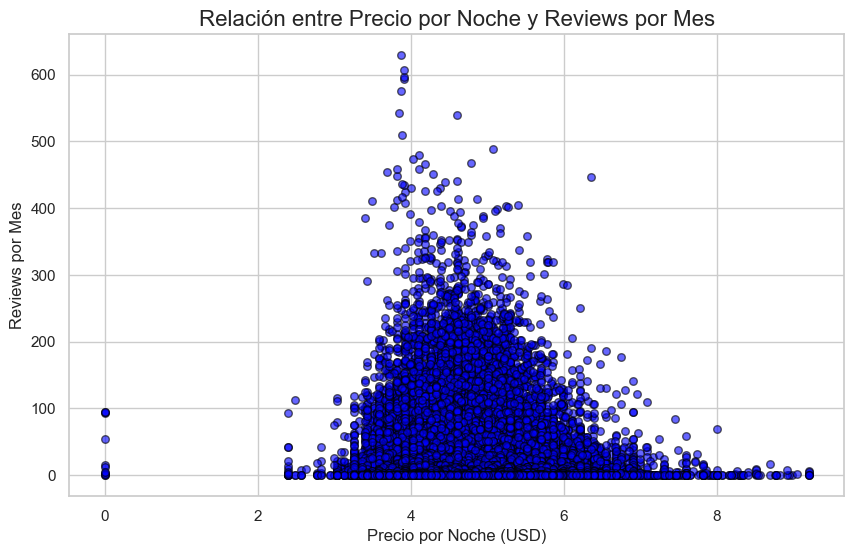

In [27]:
sns.set(style='whitegrid')
# scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df_airbnb_ny_nodup_clean_full['log_price'],              # Precio por noche
    df_airbnb_ny_nodup_clean_full['number_of_reviews'],   # Reviews por mes
    s=30,                                                # Tamaño de los puntos
    alpha=0.6,                                           # Transparencia 
    edgecolor='black',                                   
    color='blue'                                         # Color de los puntos (azul en este caso)
)
#pusimos los titulos
plt.title('Relación entre Precio por Noche y Reviews por Mes', fontsize=16)
plt.xlabel('Precio por Noche (USD)', fontsize=12)
plt.ylabel('Reviews por Mes', fontsize=12)

#Gráfico
plt.show()

# ANALISIS
# En el grafico se observa que la mayoría de los departamentos a ofrecerse tienen reviews
# Claramente se ven casos en donde los precios son MUY altos o MUY bajos en comparación con la media y tienen 0 reviews. Estos son los casos aislados
# A airbnb le sirve esta data para lograr entender la relevancia de las reviews para los usuarios(clientes). Ya que lo que más se demanda, son las del precio normal, con reviews
# Airbnb debee impulsar a sus hosts a que quieran brindar un excelente servicio por las reviews. Ya que si lo hacen, hay más probabildades de que los vuelvan a elegir.


#### Ejercicio 6
Utilicen el análisis de componentes principales para graficar las variables en dos dimensiones. Comenten los resultados obtenidos (qué porcentaje de la varianza se logra explicar con dos componentes, cómo son los *loadings*, si ven algún patrón en el gráfico).

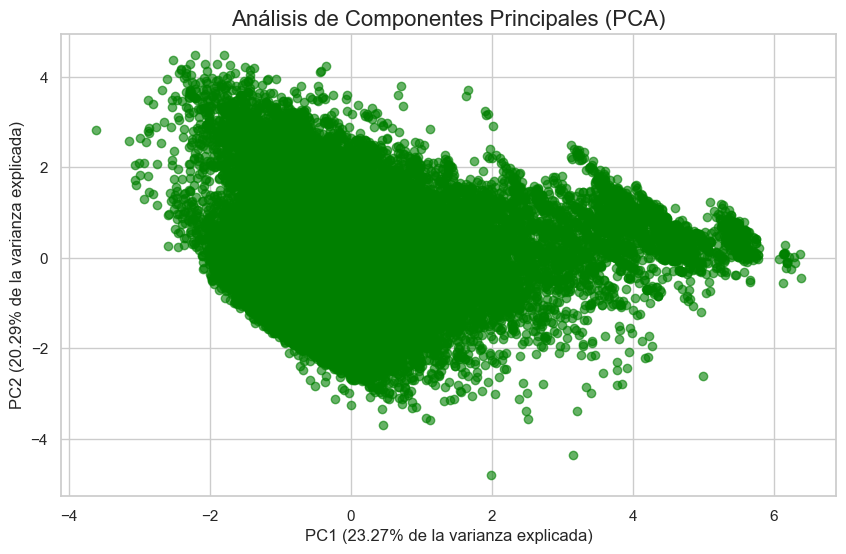

Varianza explicada por PC1: 23.27%
Varianza explicada por PC2: 20.29%
Loadings (correlaciones con las componentes principales):
                                         PC1       PC2
latitude                            0.063351 -0.005786
longitude                          -0.272806  0.471983
log_minimum_nights                  0.560822 -0.052699
log_price                           0.324772 -0.294583
log_number_of_reviews              -0.189877  0.524274
log_calculated_host_listings_count  0.579042  0.239693
log_availability_365                0.360864  0.596093


In [31]:
# Resolver acá

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # Lo hicimo para normalizar los datos y que las magnitudes sean proporcionales
pca = PCA(n_components=2)   # Queremos reducir a 2 componentes principales

# Agarro las variables numéricas(Quitamos un par porque estaban repetidas con log uy sin log)
variables = ['latitude','longitude','log_minimum_nights', 'log_price',
       'log_number_of_reviews', 'log_calculated_host_listings_count',
       'log_availability_365']

df_airbnb_ny_nodup_clean_full_clean = df_airbnb_ny_nodup_clean_full.dropna(subset=variables)

# Aplico los componentes que busco + la función scale.fit.transform PCA. Normalizo las variables para apaciguar el efecto de las magnitudes-
df_norm= scaler.fit_transform(df_airbnb_ny_nodup_clean_full_clean[variables])
pca_result = pca.fit_transform(df_norm)


# Cual es la varianza explicada según el componente()
varianza_explicada = pca.explained_variance_ratio_

# Creo un df nuevo, solaente con los resultados
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Grafico de dos dimensiones(una "x" por cada componente principal. )
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.6, c='green')
plt.title('Análisis de Componentes Principales (PCA)', fontsize=16)
plt.xlabel(f'PC1 ({varianza_explicada[0]*100:.2f}% de la varianza explicada)', fontsize=12)
plt.ylabel(f'PC2 ({varianza_explicada[1]*100:.2f}% de la varianza explicada)', fontsize=12)
plt.grid(True)
plt.show()

# Muestro proporción explicada por cada componente + correlacion de los loading;correlaciones entre las variables originales y los componentes)
print(f"Varianza explicada por PC1: {varianza_explicada[0]*100:.2f}%")
print(f"Varianza explicada por PC2: {varianza_explicada[1]*100:.2f}%")
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=variables)
print("Loadings (correlaciones con las componentes principales):")
print(loadings)


In [32]:
# Comentarios
#Cabe acalrar que se quitaron variables repetidas como por ejemplo price y log_price, como también se quitaron variables categoricas. Tal vez para proximos trabjos sería interesante ver la compàración con y sin variables categoricas y observar cuál explica más
# En primer lugar, el grafico se observa una tendencia positiva, demostrando que las variables utilizadas en los componentes están relacionadas.
#El primer componente explica un 23,7%.
#El segundo componente explica un 20,29%.
#Este analisis, logra exlplicar aprox el 44% de las variables.

#La mayor densidad de puntos se concentra cerca del origen(0,0), lo que indica que la mayoría de 
#las observaciones están agrupadas en torno a valores promedio. Sin embargo, también se observa 
#una dispersión de algunos datos hacia los extremos, lo que podría sugerir la presencia de outliers 
#o casos particulares que se desvían del comportamiento general. Además, la forma ligeramente ovalada
#que toman los puntos podría indicar una correlación no lineal entre las componentes, a pesar de que
#estas son ortogonales por definición. 


#Los loadings con mayor correlación en el PCA1:
#Estas 3 variables son las que más poonderan en el primer componente. Son las que más ayudan a comprender la varianza explicada
top_3_PCA1 = loadings['PC1'].nlargest(3)      
print(top_3_PCA1)  

#Estas 3 variables son las que más poonderan en el segundo componente.Son las que más ayudan a comprender la varianza explicada
top_3_PCA2 = loadings['PC2'].nlargest(3)      
print(top_3_PCA2)   


log_calculated_host_listings_count    0.579042
log_minimum_nights                    0.560822
log_availability_365                  0.360864
Name: PC1, dtype: float64
log_availability_365     0.596093
log_number_of_reviews    0.524274
longitude                0.471983
Name: PC2, dtype: float64


### Parte III: Predicción

El objetivo de esta parte del trabajo es intentar predecir los precios de los alojamientos.

#### Ejercicio 7
Eliminen de la base todas las variables relacionadas al precio

#### Ejercicio 8
Partan la base en una base de prueba (test) y una de entrenamiento (train) utilizando el comando <code>train_test_split</code>. La base de entrenamiento debe comprender el 70% de los datos, y la semilla a utilizar (*random state instance*) debe ser 201. Establezca a price como su variable dependiente en la base de entrenamiento (vector y). El resto de las variables ser´an las variables independientes (matriz X). Recuerden agregar la columna de unos (1).

In [273]:

#df_airbnb_ny_nodup_clean_full
#df_airbnb_ny_predict = df_airbnb_ny_nodup_clean_full.drop(columns=['id','name','neighbourhood_group','neighbourhood','room_type'])


df_airbnb_ny_predict_clean = df_airbnb_ny_nodup_clean_full.dropna()
df_airbnb_ny_predict_clean

#df_airbnb_ny_predict_clean = df_airbnb_ny_predict_na[df_airbnb_ny_predict_na['price'] <= 5000]
#df_airbnb_ny_predict_clean

,id,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,log_minimum_nights,log_price,log_number_of_reviews,log_calculated_host_listings_count,log_availability_365
0,2539,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,6,365,0.693147,5.010635,2.302585,1.945910,5.902633
1,2595,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2,355,0.693147,5.420535,3.828641,1.098612,5.874931
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,1,365,1.386294,5.017280,0.000000,0.693147,5.902633
3,3831,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,1,194,0.693147,4.499810,5.602119,0.693147,5.273000
4,5022,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,1,0,2.397895,4.394449,2.302585,0.693147,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70.0,2,0,2,9,1.098612,4.262680,0.000000,1.098612,2.302585
48891,36485057,Affordable room in Bushwick/East Williamsburg,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40.0,4,0,2,36,1.609438,3.713572,0.000000,1.098612,3.610918
48892,36485431,Sunny Studio at Historical Neighborhood,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115.0,10,0,1,27,2.397895,4.753590,0.000000,0.693147,3.332205
48893,36485609,43rd St. Time Square-cozy single bed,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55.0,1,0,6,2,0.693147,4.025352,0.000000,1.945910,1.098612


In [290]:
# Resolver acá


from sklearn.model_selection import train_test_split

# Establezco price como variable dependiente y el resto de las variables como las independientes (todas menos price).
y = df_airbnb_ny_predict_clean['log_price'] 
variables = ['latitude','longitude','log_minimum_nights','log_number_of_reviews',
             'log_calculated_host_listings_count','log_availability_365'] 
x = df_airbnb_ny_predict_clean[variables]

# Agregi la columna de unos
x = np.hstack((np.ones((x.shape[0], 1)), x))

# divido la base en train y test, con 30% de test, y semilla=201
base_train_x, base_test_x, base_train_y, base_test_y = train_test_split(x, y, test_size=0.3, random_state=201)

print(base_train_x.shape)
print(base_train_y.shape)
print(base_test_x.shape)
print(base_test_y.shape)




(34194, 7)
(34194,)
(14655, 7)
(14655,)


#### Ejercicio 9
Implementen una regresión lineal y comenten los resultados obtenidos.

In [127]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import statsmodels.api as sm


R^2 =  0.1382956885518467

Intercepto: -433.77979025584534

Coeficientes: [0.0, 1.3664334266189455, -5.1769846292930035, -0.016999423673219577, -0.04194779898515119, -0.02241735188555055, 0.048796473361516046]

Error cuadrático medio (MSE) = 0.41429403968066114
Raíz del error cuadrático medio (RMSE) =  0.6436567716420462
Error absoluto medio (MAE) =  0.49981758944943255


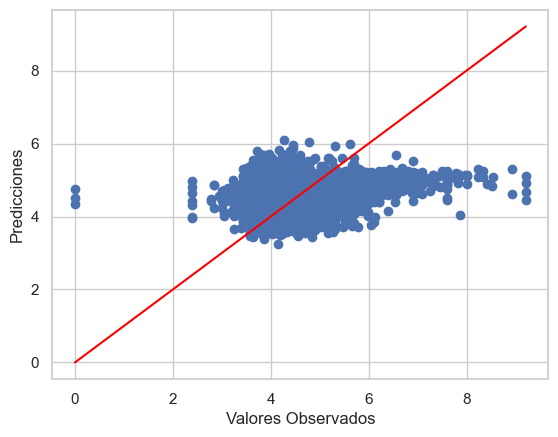

In [295]:
# Hago el modelo entrenado con los datos de train
from matplotlib.pyplot import show


model = LinearRegression().fit(base_train_x, base_train_y)

predicciones = model.predict(base_test_x)


# Veo resultados
r2 = model.score(base_train_x, base_train_y)
print("\nR^2 = ", r2)

intercepto = model.intercept_
print('\nIntercepto:', intercepto)

# el valor de todos los coeficientes del modelo 
coeficientes = model.coef_
print('\nCoeficientes:', list(coeficientes))

# Vemos el MSE

# Usando MSE de scikit-learn
mse1 = mean_squared_error(base_test_y, predicciones)

# Usando Numpy
mse2 = np.square(np.subtract(base_test_y, predicciones)).mean()

if mse1 == mse2:
    print('\nError cuadrático medio (MSE) =', mse1)
else:
    print('Usando Numpy da diferente que usando Scikit-learn, chequear código')

# También podemos ver el RMSE y el MAE
rmse = np.sqrt(mean_squared_error(base_test_y, predicciones))
print("Raíz del error cuadrático medio (RMSE) = ",rmse)
mae = mean_absolute_error(base_test_y, predicciones)
print("Error absoluto medio (MAE) = ", mae)

# Veo en un scatter plot
plt.scatter(base_test_y, predicciones, label='Predicciones')
plt.plot([base_test_y.min(), base_test_y.max()], [base_test_y.min(), base_test_y.max()], color='red')
plt.xlabel('Valores Observados')
plt.ylabel('Predicciones')
plt.show()

In [292]:
#  Realizar la validación cruzada para entrtenarmás  mi modelo
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, base_train_x, base_train_y, cv=5, scoring='neg_mean_squared_error')

# Convertir puntajes negativos a positivos
mse_scores = -scores

print("MSE para cada fold:", mse_scores)
print("MSE promedio:", mse_scores.mean())

test_score = model.score(base_test_x, base_test_y)
test_score #cerca de 1 mejor


MSE para cada fold: [0.41347972 0.41720695 0.40645708 0.42346466 0.41636573]
MSE promedio: 0.4153948294280229


0.15068057570722404